<a href="https://colab.research.google.com/github/parkyw2/parkyw2/blob/main/%EA%B8%B0%EC%9E%AC%ED%92%88_%EC%86%8C%EB%AA%A8%ED%92%88%EB%B9%84_%EA%B3%B5%EC%9E%A5%EB%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython
%matplotlib inline
from fbprophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/My\ Drive/회사 데이터

/content/drive/My Drive/회사 데이터


In [13]:
df = pd.read_csv('소모품비_기재품_plant.csv')

In [14]:
df.tail(10)

,date,1110,1120,1130,1140,1150,1160,1170,1180,total
1086,2021-12-22,4193400,1400600,0,2224040,12058740,1691700,466210,1445400,23480090
1087,2021-12-23,10788600,1317958,0,1878800,462870,0,1211400,78000,15737628
1088,2021-12-24,0,136300,0,567400,0,2484400,557320,0,3745420
1089,2021-12-25,0,0,0,0,0,0,0,0,0
1090,2021-12-26,0,0,0,0,0,0,0,0,0
1091,2021-12-27,10026356,3562000,0,2223180,0,4850900,3431300,2737980,26831716
1092,2021-12-28,3716000,0,0,0,0,5757400,1325800,774900,11574100
1093,2021-12-29,145800,0,0,387100,0,6234849,336700,583300,7687749
1094,2021-12-30,388360,835300,0,3468040,10233600,9261860,570800,0,24757960
1095,2021-12-31,0,651600,0,183400,-205956,3487730,491100,0,4607874


In [15]:
#안양
df_1110 = df[['date','1110']]

In [16]:
df_1110.tail(10)

,date,1110
1086,2021-12-22,4193400
1087,2021-12-23,10788600
1088,2021-12-24,0
1089,2021-12-25,0
1090,2021-12-26,0
1091,2021-12-27,10026356
1092,2021-12-28,3716000
1093,2021-12-29,145800
1094,2021-12-30,388360
1095,2021-12-31,0


In [17]:
df_1110['ds'] = pd.to_datetime(df['date'])

In [18]:
df_1110['y'] = df_1110['1110']

In [20]:
df_1110 = df_1110.loc[:,['ds', 'y']]

In [21]:
df_1110.head()

,ds,y
0,2019-01-01,0
1,2019-01-02,3109480
2,2019-01-03,626700
3,2019-01-04,6283080
4,2019-01-05,0


In [22]:
df_1110['ds'] = pd.to_datetime(df_1110['ds'])

In [23]:
df_1110 = df_1110[df_1110['ds'].dt.dayofweek < 5]

In [24]:
df_1110['date_index'] = df_1110['ds']

In [25]:
df_1110 = df_1110.set_index('date_index')

In [26]:
df_1110['cap'] = 30000000
df_1110['floor'] = 0

In [27]:
df_1110.head(10)

,ds,y,cap,floor
date_index,,,,
2019-01-01,2019-01-01,0,30000000,0
2019-01-02,2019-01-02,3109480,30000000,0
2019-01-03,2019-01-03,626700,30000000,0
2019-01-04,2019-01-04,6283080,30000000,0
2019-01-07,2019-01-07,48469320,30000000,0
2019-01-08,2019-01-08,4636370,30000000,0
2019-01-09,2019-01-09,627590,30000000,0
2019-01-10,2019-01-10,4796580,30000000,0
2019-01-11,2019-01-11,0,30000000,0


In [28]:
df_1110.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 784 entries, 2019-01-01 to 2021-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      784 non-null    datetime64[ns]
 1   y       784 non-null    int64         
 2   cap     784 non-null    int64         
 3   floor   784 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 30.6 KB


In [29]:
from datetime import datetime
df_1110 = df_1110[datetime(2019, 1, 1):datetime(2021, 12, 22)]

In [30]:
df_1110.tail()

,ds,y,cap,floor
date_index,,,,
2021-12-16,2021-12-16,0,30000000,0
2021-12-17,2021-12-17,4060900,30000000,0
2021-12-20,2021-12-20,1771200,30000000,0
2021-12-21,2021-12-21,1870030,30000000,0
2021-12-22,2021-12-22,4193400,30000000,0


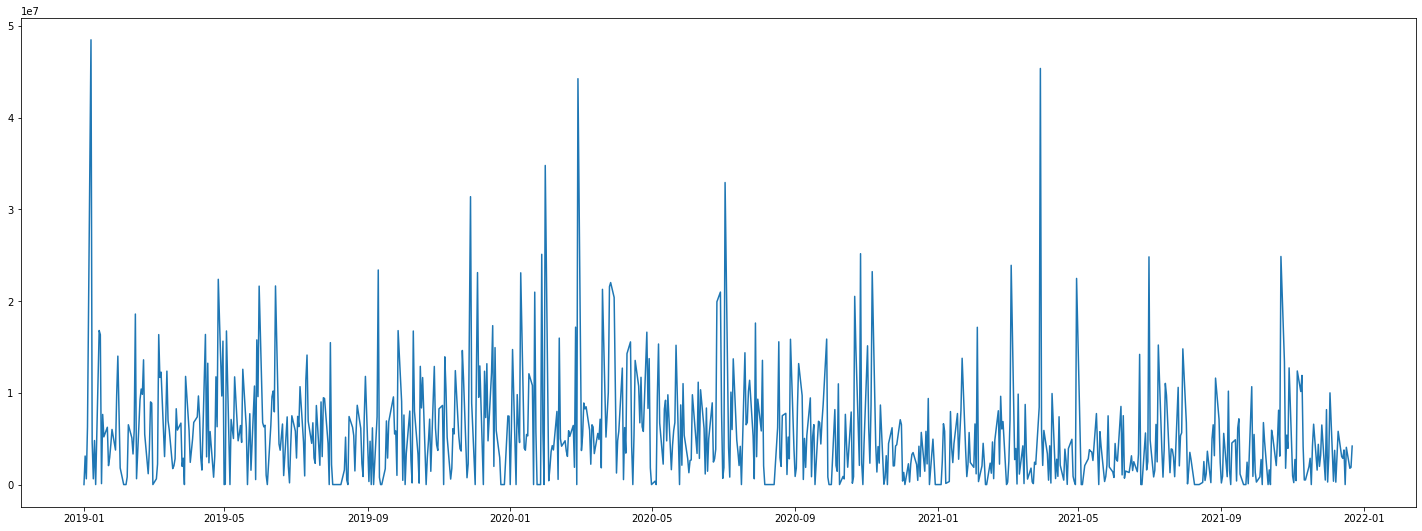

In [31]:
plt.figure(figsize = (25, 9))
plt.plot(df_1110.index,df_1110.y)
plt.show()

In [32]:
m=Prophet(growth='logistic',weekly_seasonality= 20,yearly_seasonality=5,seasonality_prior_scale=20, changepoint_prior_scale=0.5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=2)
m.add_country_holidays(country_name='KR')
m.fit(df_1110)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
future = m.make_future_dataframe(periods=9)
future = future[future['ds'].dt.dayofweek < 5]
future['cap'] = 30000000
future['floor'] = 0

In [34]:
future.tail()

,ds,cap,floor
781,2021-12-27,30000000,0
782,2021-12-28,30000000,0
783,2021-12-29,30000000,0
784,2021-12-30,30000000,0
785,2021-12-31,30000000,0


In [35]:
forecast=m.predict(future)
forecast.tail(10)

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,Alternative holiday of Children's Day_upper,Alternative holiday of Lunar New Year's Day,Alternative holiday of Lunar New Year's Day_lower,Alternative holiday of Lunar New Year's Day_upper,Alternative public holiday,Alternative public holiday_lower,Alternative public holiday_upper,Birthday of the Buddha,Birthday of the Buddha_lower,Birthday of the Buddha_upper,Children's Day,Children's Day_lower,Children's Day_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Chuseok,Chuseok_lower,Chuseok_upper,Hangeul Day,Hangeul Day_lower,Hangeul Day_upper,Independence Movement Day,Independence Movement Day_lower,Independence Movement Day_upper,Labour Day,Labour Day_lower,Labour Day_upper,Liberation Day,Liberation Day_lower,...,Memorial Day,Memorial Day_lower,Memorial Day_upper,National Foundation Day,National Foundation Day_lower,National Foundation Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,The day preceding of Chuseok,The day preceding of Chuseok_lower,The day preceding of Chuseok_upper,The day preceding of Lunar New Year's Day,The day preceding of Lunar New Year's Day_lower,The day preceding of Lunar New Year's Day_upper,The second day of Chuseok,The second day of Chuseok_lower,The second day of Chuseok_upper,The second day of Lunar New Year's Day,The second day of Lunar New Year's Day_lower,The second day of Lunar New Year's Day_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
774,2021-12-20,70827.684324,30000000,0,-2.898278e+06,1.140081e+07,70827.684324,70827.684324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.189482e+06,4.189482e+06,4.189482e+06,0.0,0.0,0.0,-8.698697e+05,-8.698697e+05,-8.698697e+05,5.510173e+06,5.510173e+06,5.510173e+06,-450821.490954,-450821.490954,-450821.490954,0.0,0.0,0.0,4.260309e+06
775,2021-12-21,71033.957955,30000000,0,-4.031423e+06,1.059173e+07,71033.957955,71033.957955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.433217e+06,3.433217e+06,3.433217e+06,0.0,0.0,0.0,-7.234426e+05,-7.234426e+05,-7.234426e+05,4.584945e+06,4.584945e+06,4.584945e+06,-428285.177154,-428285.177154,-428285.177154,0.0,0.0,0.0,3.504251e+06
776,2021-12-22,71240.830893,30000000,0,-2.634810e+06,1.184686e+07,71240.830893,71240.830893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.526273e+06,4.526273e+06,4.526273e+06,0.0,0.0,0.0,-4.792474e+05,-4.792474e+05,-4.792474e+05,5.409090e+06,5.409090e+06,5.409090e+06,-403569.732717,-403569.732717,-403569.732717,0.0,0.0,0.0,4.597513e+06
777,2021-12-23,71448.304871,30000000,0,-1.823807e+06,1.210043e+07,71448.304871,71448.304871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.971629e+06,4.971629e+06,4.971629e+06,0.0,0.0,0.0,-1.522983e+05,-1.522983e+05,-1.522983e+05,5.500634e+06,5.500634e+06,5.500634e+06,-376706.933987,-376706.933987,-376706.933987,0.0,0.0,0.0,5.043077e+06
778,2021-12-24,71656.381627,30000000,0,1.008748e+06,1.527636e+07,71656.381627,71656.381627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [36]:
preds= forecast['yhat'][:-7]

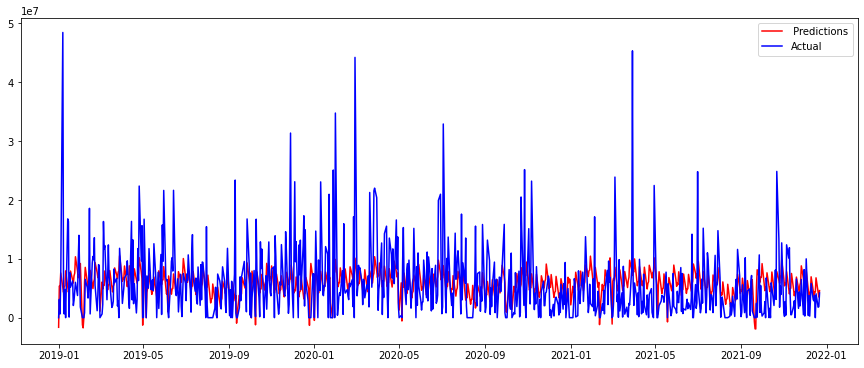

In [38]:
plt.figure(figsize=(15,6))
plt.plot(df_1110.index,preds,color='red',label=' Predictions')
plt.plot(df_1110.index,df_1110.y,color='blue',label='Actual')
plt.legend()
plt.show()

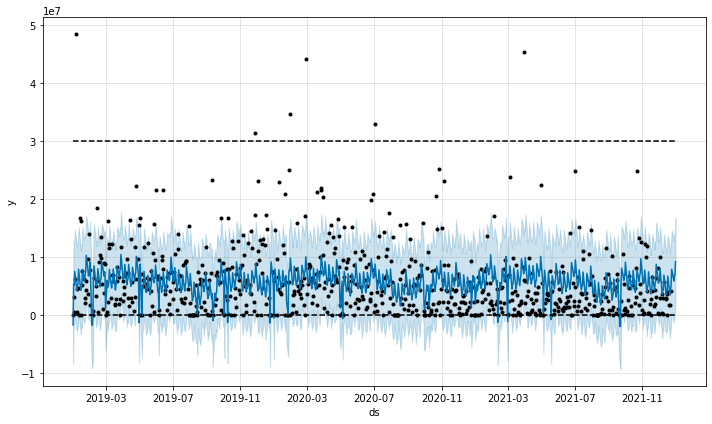

In [39]:
fig = m.plot(m.predict(future))

In [41]:
r2 = round(r2_score(df_1110["y"], preds), 3)
mse = round(mean_squared_error(df_1110["y"], preds), 3)
mae = round(mean_absolute_error(df_1110["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.111
MSE:  31318539590336.895
MAE:  3929033.653


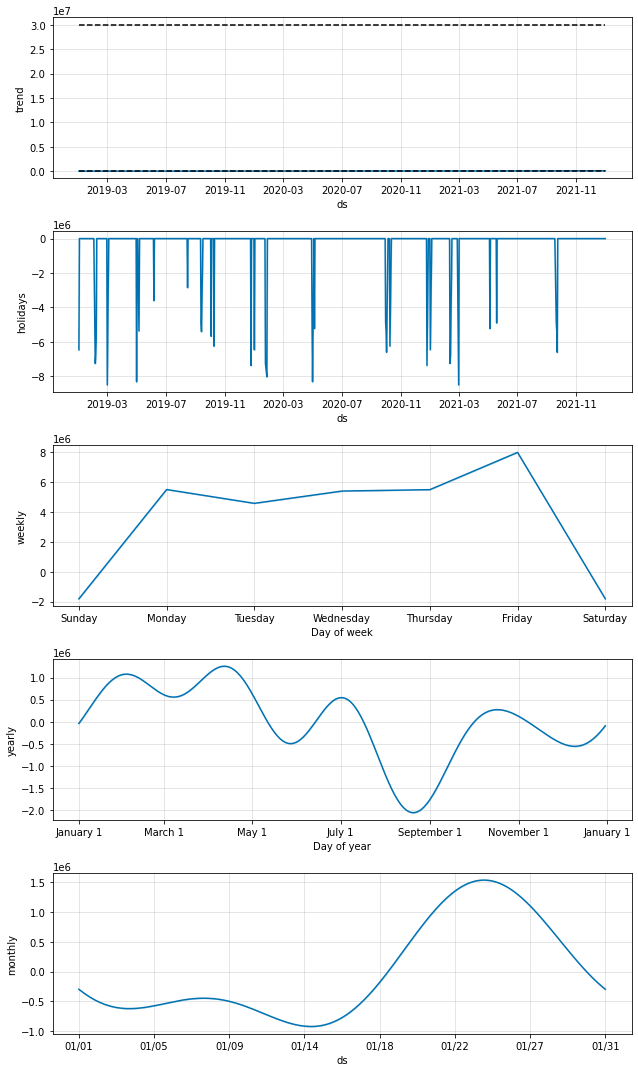

In [42]:
fig = m.plot_components(forecast)

In [43]:
forecast.tail()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,Alternative holiday of Children's Day_upper,Alternative holiday of Lunar New Year's Day,Alternative holiday of Lunar New Year's Day_lower,Alternative holiday of Lunar New Year's Day_upper,Alternative public holiday,Alternative public holiday_lower,Alternative public holiday_upper,Birthday of the Buddha,Birthday of the Buddha_lower,Birthday of the Buddha_upper,Children's Day,Children's Day_lower,Children's Day_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Chuseok,Chuseok_lower,Chuseok_upper,Hangeul Day,Hangeul Day_lower,Hangeul Day_upper,Independence Movement Day,Independence Movement Day_lower,Independence Movement Day_upper,Labour Day,Labour Day_lower,Labour Day_upper,Liberation Day,Liberation Day_lower,...,Memorial Day,Memorial Day_lower,Memorial Day_upper,National Foundation Day,National Foundation Day_lower,National Foundation Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,The day preceding of Chuseok,The day preceding of Chuseok_lower,The day preceding of Chuseok_upper,The day preceding of Lunar New Year's Day,The day preceding of Lunar New Year's Day_lower,The day preceding of Lunar New Year's Day_upper,The second day of Chuseok,The second day of Chuseok_lower,The second day of Chuseok_upper,The second day of Lunar New Year's Day,The second day of Lunar New Year's Day_lower,The second day of Lunar New Year's Day_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
779,2021-12-27,72284.246015,30000000,0,-3.565516e+05,1.405084e+07,72284.246015,72284.246015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.545986e+06,6.545986e+06,6.545986e+06,0.0,0.0,0.0,1.284612e+06,1.284612e+06,1.284612e+06,5.510173e+06,5.510173e+06,5.510173e+06,-248798.295335,-248798.295335,-248798.295335,0.0,0.0,0.0,6.618270e+06
780,2021-12-28,72494.751360,30000000,0,-9.715243e+05,1.312201e+07,72494.751360,72494.751360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.846681e+06,5.846681e+06,5.846681e+06,0.0,0.0,0.0,1.473793e+06,1.473793e+06,1.473793e+06,4.584945e+06,4.584945e+06,4.584945e+06,-212056.692876,-212056.692876,-212056.692876,0.0,0.0,0.0,5.919176e+06
781,2021-12-29,72705.868247,30000000,0,-3.926302e+05,1.481125e+07,72705.868247,72705.868247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.771786e+06,6.771786e+06,6.771786e+06,0.0,0.0,0.0,1.536284e+06,1.536284e+06,1.536284e+06,5.409090e+06,5.409090e+06,5.409090e+06,-173587.312730,-173587.312730,-173587.312730,0.0,0.0,0.0,6.844492e+06
782,2021-12-30,72917.598444,30000000,0,-4.024354e+05,1.370819e+07,72917.598444,72917.598444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.834210e+06,6.834210e+06,6.834210e+06,0.0,0.0,0.0,1.467073e+06,1.467073e+06,1.467073e+06,5.500634e+06,5.500634e+06,5.500634e+06,-133497.685225,-133497.685225,-133497.685225,0.0,0.0,0.0,6.907127e+06
783,2021-12-31,73129.943724,30000000,0,1.585294e+06,1.616362e+07,73129.943723,73129.943724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

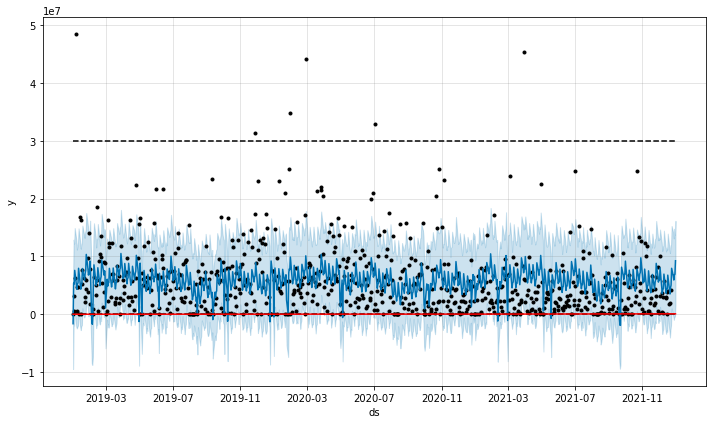

In [44]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [45]:
  pd.options.display.float_format = '{:,.0f}'.format

In [46]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9))

            ds      yhat  yhat_lower  yhat_upper
775 2021-12-21 3,504,251  -4,031,423  10,591,726
776 2021-12-22 4,597,513  -2,634,810  11,846,862
777 2021-12-23 5,043,077  -1,823,807  12,100,428
778 2021-12-24 7,951,139   1,008,748  15,276,365
779 2021-12-27 6,618,270    -356,552  14,050,844
780 2021-12-28 5,919,176    -971,524  13,122,013
781 2021-12-29 6,844,492    -392,630  14,811,255
782 2021-12-30 6,907,127    -402,435  13,708,195
783 2021-12-31 9,257,905   1,585,294  16,163,620


In [51]:
final_1110 = forecast[['ds', 'yhat']]
final_1110['yhat_1110'] = final_1110['yhat']
final_1110 = final_1110[['ds', 'yhat_1110']]

In [52]:
final_1110.head()

,ds,yhat_1110
0,2019-01-01,"-1,638,232"
1,2019-01-02,"5,370,695"
2,2019-01-03,"5,237,673"
3,2019-01-04,"7,591,302"
4,2019-01-07,"5,139,840"
